In [2]:
from random import random
from IPython.core.display import HTML
from importlib import reload
import datetime
import pandas as pd
import mode_notebook_assets.practical_dashboard_displays as pdd
reload(pdd)

/Users/joelbecker/.pyenv/virtualenvs/mode-notebook-assets/3.7.9/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


<module 'mode_notebook_assets.practical_dashboard_displays' from '/Users/joelbecker/src/github.com/Shopify/mode-notebook-assets/mode_notebook_assets/practical_dashboard_displays.py'>

In [3]:
_category_1 = [f'1{char}' for char in 'ABC']
_category_2 = [f'2{char}' for char in 'XYZ']
_t = [datetime.datetime(2020,1,1) + datetime.timedelta(days=x) for x in range(0,25)]

rows = []
for t in _t:
    for c1 in _category_1:
        for c2 in _category_2:
            rows.append({
                'Day': t,
                'Category 1': c1,
                'Category 2': c2,
                'Revenue': 50 + hash(c1) % 10 + (hash(c2) % 2 * _t.index(t)/4) + 10*random(),
            })

_df = pd.DataFrame.from_records(rows)

_df

,Day,Category 1,Category 2,Revenue
0,2020-01-01,1A,2X,64.030670
1,2020-01-01,1A,2Y,62.512089
2,2020-01-01,1A,2Z,58.390799
3,2020-01-01,1B,2X,56.645155
4,2020-01-01,1B,2Y,53.519346
...,...,...,...,...
220,2020-01-25,1B,2Y,64.074491
221,2020-01-25,1B,2Z,58.082472
222,2020-01-25,1C,2X,61.376833
223,2020-01-25,1C,2Y,62.337405


In [43]:
evaluation_generator = pdd.DatasetEvaluationGenerator(
    df=_df,
    grouping_set=['Category 1', 'Category 2'],
    index_column='Day',
    measure_column='Revenue',
)

In [44]:
print('Series generation')
{key: len(series) for key, series in evaluation_generator.generate_grouping_set_series_lookup().items()}

Series generation


{'1C 2Y': 25,
 '1A 2Y': 25,
 '1A 2X': 25,
 '1A 2Z': 25,
 '1C 2X': 25,
 '1C 2Z': 25,
 '1B 2Y': 25,
 '1B 2Z': 25,
 '1B 2X': 25}

In [45]:
print('Pipeline generation')
evaluation_generator.generate_grouping_set_metric_pipeline_lookup().keys()

Pipeline generation


dict_keys(['1C 2Y', '1A 2Y', '1A 2X', '1A 2Z', '1C 2X', '1C 2Z', '1B 2Y', '1B 2Z', '1B 2X'])

In [46]:
print('Summary record generation')
len(evaluation_generator.generate_actionability_summary_records())

Summary record generation


9

,Metric,Current Value,Status Dot,Sparkline
0,1C 2Y,66,,
1,1A 2Y,72,,
2,1A 2X,63,,
3,1A 2Z,65,,
4,1C 2X,67,,
5,1C 2Z,65,,
6,1B 2Y,58,,
7,1B 2Z,59,,
8,1B 2X,55,,

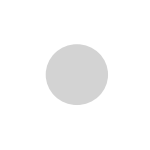
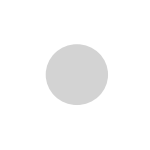
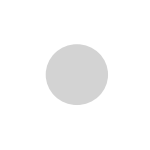
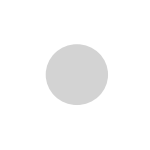
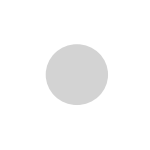
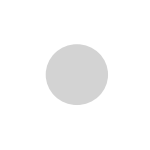
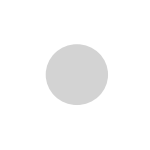
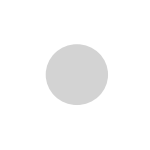
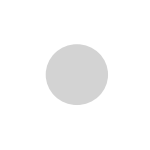

In [48]:
evaluation_generator.display_actionability_summary_records()

In [ ]:
evaluation_generator.display_actionability_time_series_grid()

,Metric,Current Value,Status Dot,Sparkline
0,1A,198,,
1,1B,187,,
2,1C,179,,
,Metric,Current Value,Status Dot,Sparkline
0,2Y,196,,
1,2X,194,,
2,2Z,175,,
,Metric,Current Value,Status Dot,Sparkline
0,1A,198,,
1,1B,187,,

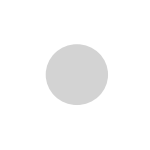
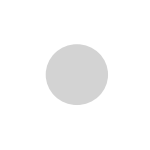
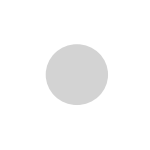
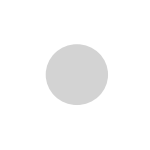
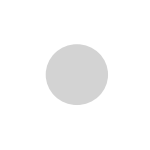
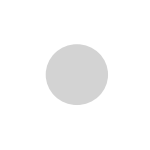
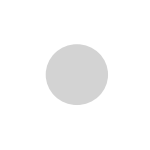
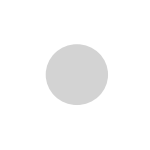
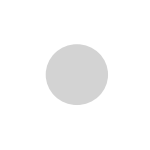

In [5]:
## Tophat the segmentation grid display template
HTML(
    pdd.make_metric_segmentation_grid_display(
        df=_df,
        index_column='Day',
        measure_column='Revenue',
        spec=[
            ('Category 1', 'First Category'),
            ('Category 2', 'Second Category'),
            ('Category 1', 'First Category Repeated'),
        ]
    )
)